# Indian Startup Data Exploration

India is one of the fastest growing economy in the world. There are a lot of innovative startups coming up in the region and a lot of funding for these startups as well.

* Wanted to know what type of startups are getting funded in the last few years?

* Wanted to know who are the important investors? 

* Wanted to know the hot fields that get a lot of funding these days?

* There are two main scenarios:

* Investors are forming a partnership with the startups they choose to invest in – if the company turns a profit, investors make returns proportionate to their amount of equity in the startup; if the startup fails, the investors lose the money they’ve invested. So, they want to know, which startup to invest in.

* Start-up companies often look to angel or investors to raise much-needed capital to get their business off the ground - but how does one value a brand new company?

This dataset is a chance to explore the Indian start up scene. Deep dive into funding data,derive insights to answer the above questions and also peek into the future of the market. 
We have been provided with data containing features like date, industry verticals, startup location,investment type,amount of investment,investor names etc.
Lets, start exploring and analyzing the data then!

## Importing Libraries

In [7]:
! pip install plotly==4.8.2

In [18]:
import os
import string
import datetime
import numpy as np 
import pandas as pd 
plt.style.use("fivethirtyeight")
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# import plotly.express as px

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999



In [7]:
os.getcwd()

'C:\\Users\\RUPA\\Desktop\\Codealong_Wednesdays-master\\startup_data_analysis\\notebook'

### Load the data

In [8]:
df = pd.read_csv('startup_data.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNo               3044 non-null   int64  
 1   Date              3044 non-null   object 
 2   StartupName       3044 non-null   object 
 3   IndustryVertical  2873 non-null   object 
 4   SubVertical       2108 non-null   object 
 5   City              2864 non-null   object 
 6   InvestorsName     3020 non-null   object 
 7   InvestmentType    3040 non-null   object 
 8   AmountInUSD       2080 non-null   object 
 9   Remarks           419 non-null    object 
 10  year              3044 non-null   int64  
 11  yearmonth         3044 non-null   object 
 12  CleanedAmount     3044 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 309.3+ KB


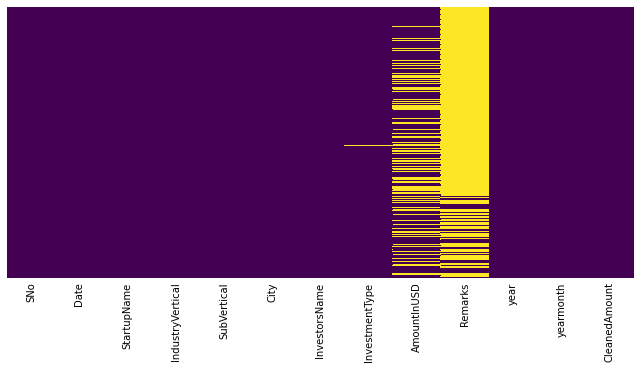

In [84]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

In [9]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020,2020-01-01,200000000.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,NCR,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020,2020-01-01,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,"1,83,58,860",NaN,2020,2020-01-01,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,NCR,Vinod Khatumal,Preseries A,"30,00,000",NaN,2020,2020-01-01,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,"18,00,000",NaN,2020,2020-01-01,1800000.0


In [49]:
print("Information of total number of non-empty columns")
print("------------------------------------------------")
print(df.info(null_counts=True))

Information of total number of non-empty columns
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNo               3044 non-null   int64  
 1   Date              3044 non-null   object 
 2   StartupName       3044 non-null   object 
 3   IndustryVertical  2873 non-null   object 
 4   SubVertical       2108 non-null   object 
 5   City              2864 non-null   object 
 6   InvestorsName     3020 non-null   object 
 7   InvestmentType    3040 non-null   object 
 8   AmountInUSD       2080 non-null   object 
 9   Remarks           419 non-null    object 
 10  year              3044 non-null   int64  
 11  yearmonth         3044 non-null   object 
 12  CleanedAmount     3044 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 309.3+ KB
None


In [46]:
print('rows {rows} in total and columns {columns} in total '.format(rows=df.shape[0],columns=df.shape[1]))

rows 3044 in total and columns 13 in total 


In [48]:
print("Columns and their datatypes")
print("---------------------------")
df.dtypes #.dtypes are used to display datatypes of each column

Columns and their datatypes
---------------------------


SNo                   int64
Date                 object
StartupName          object
IndustryVertical     object
SubVertical          object
City                 object
InvestorsName        object
InvestmentType       object
AmountInUSD          object
Remarks              object
year                  int64
yearmonth            object
CleanedAmount       float64
dtype: object

In [50]:
print("Frequency count of missing values")
df.apply(lambda X:sum(X.isnull())) 
#apply function is used to do mapping column-wise
#apply function can apply tranformations to each column individually

Frequency count of missing values


SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
City                 180
InvestorsName         24
InvestmentType         4
AmountInUSD          964
Remarks             2625
year                   0
yearmonth              0
CleanedAmount          0
dtype: int64

## Repersentation of missing data

* Since we can see that 'remarks' has the higher density of missing data,we can neglect this column
* Here we can use estimated statistical values of available data of     attribute('AmountInUSD') to fill the missing values


In [62]:
df['City']=df['City'].fillna(value='NotSpecific')
df['IndustryVertical']=df['IndustryVertical'].fillna(value='Other')
df['SubVertical']=df['SubVertical'].fillna(value='Other')


In [61]:
#city column is having multiple city names for some records
import re#importing regular expressions
def convert_Slash(x):#converts citylocation where multiple citiescentres
    x=x.lower()#converting  whole data to lower case to avoid duplicate entries 
    if   re.search('/',x):
        return x.split('/')[0].strip()#converting multiple citycentres to single one 
    else :
        return x.strip()# removing extra spaces from left and right to reduce duplicate cities
df['City']=df['City'].apply(convert_Slash)

Deleting Insignificant columns

* Here as we can see that 'Remarks column has very high missing data frequency so "Remarks" column is not useful and will create bias in analysis
* Serial number is not useful and hence deleted as data is organised according to Date column

In [64]:
newdf=df.copy()#backup cleansed data
del newdf['Remarks']#remaks is deleted to overcome stability in analysis
del newdf['SNo']

> 'Investment' type column has repeated values of categories

> Categories have alphabetical error

This column has unformatted categories which results in repetition error(spaces between words) Extra spaces in categories of Investment type will create duplicate categories For example Here -'Seed Funding' and 'Seed' are same and can cause data duplicacy

In [65]:
print('Different categories of Inverstment Type before cleansing and removing duplicacy in categories are as follows- ')
newdf['InvestmentType'].value_counts().index# aggregating frequency count according to categories of investment type

Different categories of Inverstment Type before cleansing and removing duplicacy in categories are as follows- 


Index(['Seed Funding', 'Private Equity', 'Seed Angel Funding', 'Debt Funding',
       'Series A', 'Series B', 'Series C', 'Series D', 'PreSeries A', 'Seed',
       'Private Equity Round', 'Equity', 'Venture Round', 'Series F',
       'Corporate Round', 'Crowd Funding', 'Series E', 'Bridge Round',
       'Structured Debt', 'Term Loan', 'Debt and Preference capital',
       'Seed Funding Round', 'Inhouse Funding', 'Single Venture',
       'PrivatenEquity', 'Angel Funding', 'Series G', 'Series J',
       'Venture  Series Unknown', 'Series H', 'Private Funding', 'Private',
       'DebtFunding', 'Funding Round', 'Maiden Round', 'Angel', 'Venture',
       'Mezzanine', 'Angel Round', 'Equity Based Funding', 'Debt',
       'Preseries A', 'Series B Extension'],
      dtype='object')

## Fomatting dates to time series

In [68]:
def rem_err_date(x):#function checks for error in format of date column in funding dataframe
    if re.search('.',x):#data column has formatting errors like '12/052015','13/042015' where backslash (/) is missing or at wrong position
        return x.replace('.','')
    return x

newdf['Date']=newdf['Date'].apply(rem_err_date)#applying user defined funciton to date column using apply() which maps u.d.f to each record of date column
newdf['Date'].replace('12/052015','12/05/2015',inplace=True)
newdf['Date'].replace('15/012015','15/01/2015',inplace=True)
newdf['Date'].replace('22/01//2015','22/01/2015',inplace=True)
newdf['Date'].replace('13/042015','13/04/2015',inplace=True)
newdf['Date']=pd.to_datetime(newdf['Date'],format='%d/%m/%Y')#d/m/y is the format and to_datetime() is used to convert the datatype of date column to "datetime" from string

In [69]:
print('processed datatype of Date column')
newdf.dtypes['Date']

processed datatype of Date column


dtype('<M8[ns]')

In [73]:
newdf.columns

Index(['Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'year', 'yearmonth',
       'CleanedAmount', 'numberofinvestors'],
      dtype='object')

## Preprocessing number of investors for each startup

As various startups have multiple number of investors arrange according to the number of investors for a particular startup(startup name)

In [71]:
def calculate_n_investors(x):#function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newdf['numberofinvestors']=newdf['InvestorsName'].replace(
    np.NaN,'empty').apply(calculate_n_investors)#removing missing investors and replacing with 'empty'

In [72]:
n_inv2=newdf

n_inv=newdf['InvestorsName']
n_inv.fillna(value='None',inplace=True)
listed_n_inv=n_inv.apply(lambda x: x.lower().strip().split(','))
investors=[]
for i in listed_n_inv:
    for j in i:
        if(i!='None' or i!=''):
            investors.append(j.strip())
unique_investors=list(set(investors))

In [78]:
newdf['CleanedAmount']=newdf['CleanedAmount'].astype('int')


In [79]:
# fillinf missing values in Investment type
newdf['InvestmentType'].fillna(method='bfill',inplace=True)#backward filling of null values

In [80]:
# converting data to lower case to avoid duplicacy
newdf.iloc[:,[1,2,3,4,6]]=newdf.iloc[:,[1,2,3,4,6]].applymap(lambda x: x.lower().replace(' ','') if pd.notnull(x) is True else x )

In [81]:
def check(x):
    if(pd.notnull(x)):
        return x.lower()
newdf.iloc[:,3]=newdf.iloc[:,3].apply(check)  

## Analysis of data after cleaning
 * here yellow bars represent the Missing data(NULL values)

In [88]:
newdf.dtypes

Date                 datetime64[ns]
StartupName                  object
IndustryVertical             object
SubVertical                  object
City                         object
InvestorsName                object
InvestmentType               object
AmountInUSD                  object
year                          int64
yearmonth                    object
CleanedAmount                 int32
numberofinvestors             int64
dtype: object

In [91]:

newdf['CleanedAmount']=round(newdf['CleanedAmount'].fillna(np.mean(newdf['CleanedAmount'])))
newdf['CleanedAmount']=newdf['CleanedAmount'].astype('int')

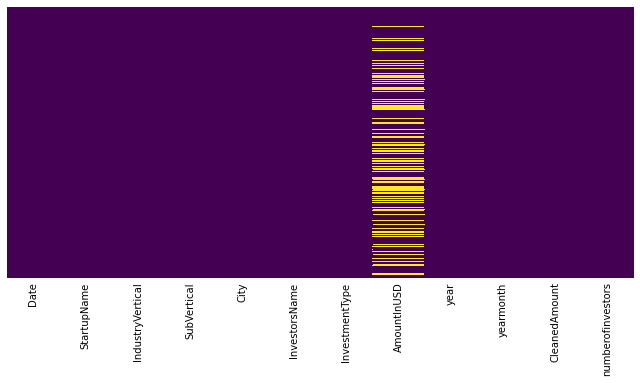

In [92]:
plt.figure(figsize=(10,5))
sns.heatmap(newdf.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

### Removing ambigous records(startup names like flipkart and flipkart.com )

In [96]:
unique_startup_name=list(newdf['StartupName'].unique())
startupname=list(newdf['StartupName'])
for i in range(len(unique_startup_name)):
    for j in range(len(startupname)):
        if(re.search(unique_startup_name[i],startupname[j])):
            startupname[j]=unique_startup_name[i]
newdf['StartupName']=startupname

In [97]:
newdf.head(10)

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,year,yearmonth,CleanedAmount,numberofinvestors
0,2020-01-09,byju’s,e-tech,e-learning,bangalore,Tiger Global Management,privateequityround,"20,00,00,000",2020,2020-01-01,200000000,1
1,2020-01-13,shuttl,transportation,appbasedshuttleservice,ncr,Susquehanna Growth Equity,seriesc,"80,48,394",2020,2020-01-01,8048394,1
2,2020-01-09,mamaearth,e-commerce,retailerofbabyandtoddlerproducts,bangalore,Sequoia Capital India,seriesb,"1,83,58,860",2020,2020-01-01,18358860,1
3,2020-01-02,thb,fintech,onlineinvestment,ncr,Vinod Khatumal,preseriesa,"30,00,000",2020,2020-01-01,3000000,1
4,2020-01-02,fashor,fashionandapparel,embroiledclothesforwomen,mumbai,Sprout Venture Partners,seedfunding,"18,00,000",2020,2020-01-01,1800000,1
5,2020-01-13,pando,logistics,"open-market,freightmanagementplatform",chennai,Chiratae Ventures,seriesa,"90,00,000",2020,2020-01-01,9000000,1
6,2020-01-10,zomato,hospitality,onlinefooddeliveryplatform,ncr,Ant Financial,privateequityround,"15,00,00,000",2020,2020-01-01,150000000,1
7,2019-12-12,ecozen,technology,agritech,pune,Sathguru Catalyzer Advisors,seriesa,"60,00,000",2019,2019-12-01,6000000,1
8,2019-12-06,cardekho,e-commerce,automobile,ncr,Ping An Global Voyager Fund,seriesd,"7,00,00,000",2019,2019-12-01,70000000,1
9,2019-12-03,dhruva,aerospace,satellitecommunication,bangalore,"Mumbai Angels, Ravikanth Reddy",seed,"5,00,00,000",2019,2019-12-01,50000000,2


## *INDEPTH DATA EXPLORATION*

### Can we get an overview of the number of fundings that has changed over time?

Text(0.5, 1.0, 'Number of funding deals - yearly')

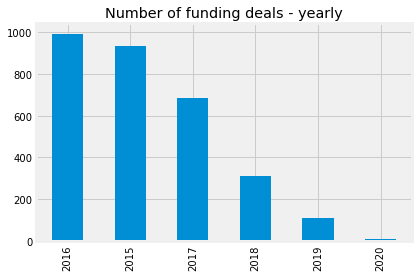

In [99]:
(newdf.year.value_counts()).plot.bar()
plt.title('Number of funding deals - yearly')



* Years 2015 & 2016 has got more number of fundings compared to the recent years

* We can see a clear decling trend in the number of funding deals from 2016. Not sure of the exact reason. One thing could be that not all the funding deals are captured in the recent days.



In [100]:
# getting the number of fundings based on yearmonth
cnt_srs = newdf["yearmonth"].value_counts().sort_index()
trace = go.Scatter(
    x=cnt_srs.index.astype(str),
    y=cnt_srs.values)
# setting up the layout
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals - month on month",
        x=0.5
    ),
    font=dict(size=11),
    width=500,
    height=400,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")



We can see a steady decline here as well but seems to be increasing in the last few months.


In [108]:
newdf["CleanedAmount"]=df['CleanedAmount']
newdf['CleanedAmount'].sort_values()

2125   -9.990000e+02
1464   -9.990000e+02
708    -9.990000e+02
709    -9.990000e+02
710    -9.990000e+02
            ...     
31      1.000000e+09
830     1.400000e+09
966     1.400000e+09
651     2.500000e+09
60      3.900000e+09
Name: CleanedAmount, Length: 3044, dtype: float64

## Funding Values


### Can we get an overview of the funding values investors usually invest?

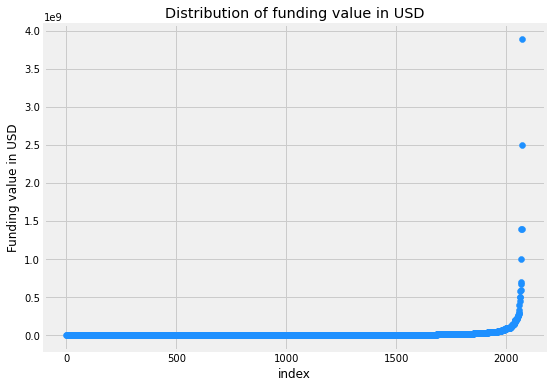

In [109]:
# subsetting the funding values
AmountInUSD = newdf["CleanedAmount"]
AmountInUSD = AmountInUSD[AmountInUSD!=-999]
# plotting the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(range(len(AmountInUSD)), np.sort(AmountInUSD.values), color="#1E90FF")
plt.xlabel('index', fontsize=12)
plt.ylabel('Funding value in USD', fontsize=12)
plt.title("Distribution of funding value in USD")
plt.show()



There are some extreme values at the right. Let us see who are these very well funded startups.



In [116]:
tp10fund=newdf.groupby('StartupName')['CleanedAmount'].sum().sort_values(ascending=False)
tp10fund.head(10)

StartupName
flipkart     4.759700e+09
paytm        3.348948e+09
ola          2.108773e+09
oyo          9.969980e+08
udaan        8.700000e+08
snapdeal     7.000000e+08
truenorth    6.000000e+08
bigbasket    5.120000e+08
goqii        4.633970e+08
zomato       4.350000e+08
Name: CleanedAmount, dtype: float64

In [110]:
newdf.iloc[df["CleanedAmount"].sort_values(ascending=False).index[:5]]

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,year,yearmonth,CleanedAmount,numberofinvestors
60,2019-08-27,rapido,transportation,biketaxi,bangalore,Westbridge Capital,seriesb,"3,90,00,00,000",2019,2019-08-01,3.900000e+09,1
651,2017-08-11,flipkart,e-commerce,onlinemarketplace,bangalore,Softbank,privateequity,"2,50,00,00,000",2017,2017-08-01,2.500000e+09,1
966,2017-03-21,flipkart,e-commerce,ecommercemarketplace,bangalore,"Microsoft, eBay, Tencent Holdings",privateequity,"1,40,00,00,000",2017,2017-03-01,1.400000e+09,3
830,2017-05-18,paytm,e-commerce,mobilewallet&ecommerceplatform,bangalore,SoftBank Group,privateequity,"1,40,00,00,000",2017,2017-05-01,1.400000e+09,1
31,2019-11-25,paytm,fintech,mobilewallet,ncr,Vijay Shekhar Sharma,fundinground,"1,00,00,00,000",2019,2019-11-01,1.000000e+09,1




* Rapido Bike Taxi looks like leading the pack by raising 3.9 Billion USD. But wait, this looks fishy. Infact Rapido raised 3.9 Billion INR and not USD. So this one is around 54 Million USD. This also shows that the data is not very accurate and so there should be caution in using it.
    
* Three of the next four high fundings are flipkart which seems to be expected and the other one is PayTM.
* Also Swiggy raised 1 Billion USD last year which is not in the data.

We will correct the data for Rapido and do the following analysis.


In [111]:
# Correcting the funding value
newdf["CleanedAmount"][df["CleanedAmount"]==3900000000] = 50000000

# Getting the sum, count and mean values of funding
cnt_df = newdf.groupby('year')['CleanedAmount'].agg(["sum","count","mean"])
# plotting a graph of the sum of fundings
cnt_srs = cnt_df["sum"]
cnt_srs = cnt_srs.sort_index()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Sum of funding value in each year",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* Though 2016 is the year with most number of funding deals, it is the year with the lowest sum (2020 is yet to complete)
* 2017 has got the highest total amount of funding in the last 5 years. Out of the 10B in 2017, 5.5B is raised by Flipkart and PayTM in 3 deals which we can see in the table above the plot.



In [112]:
# plotting a graph for the mean funding values
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Mean of funding value in each year",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

## WordCloud of best startups and sectors by amount of funding

In [121]:
# ! pip install wordcloud

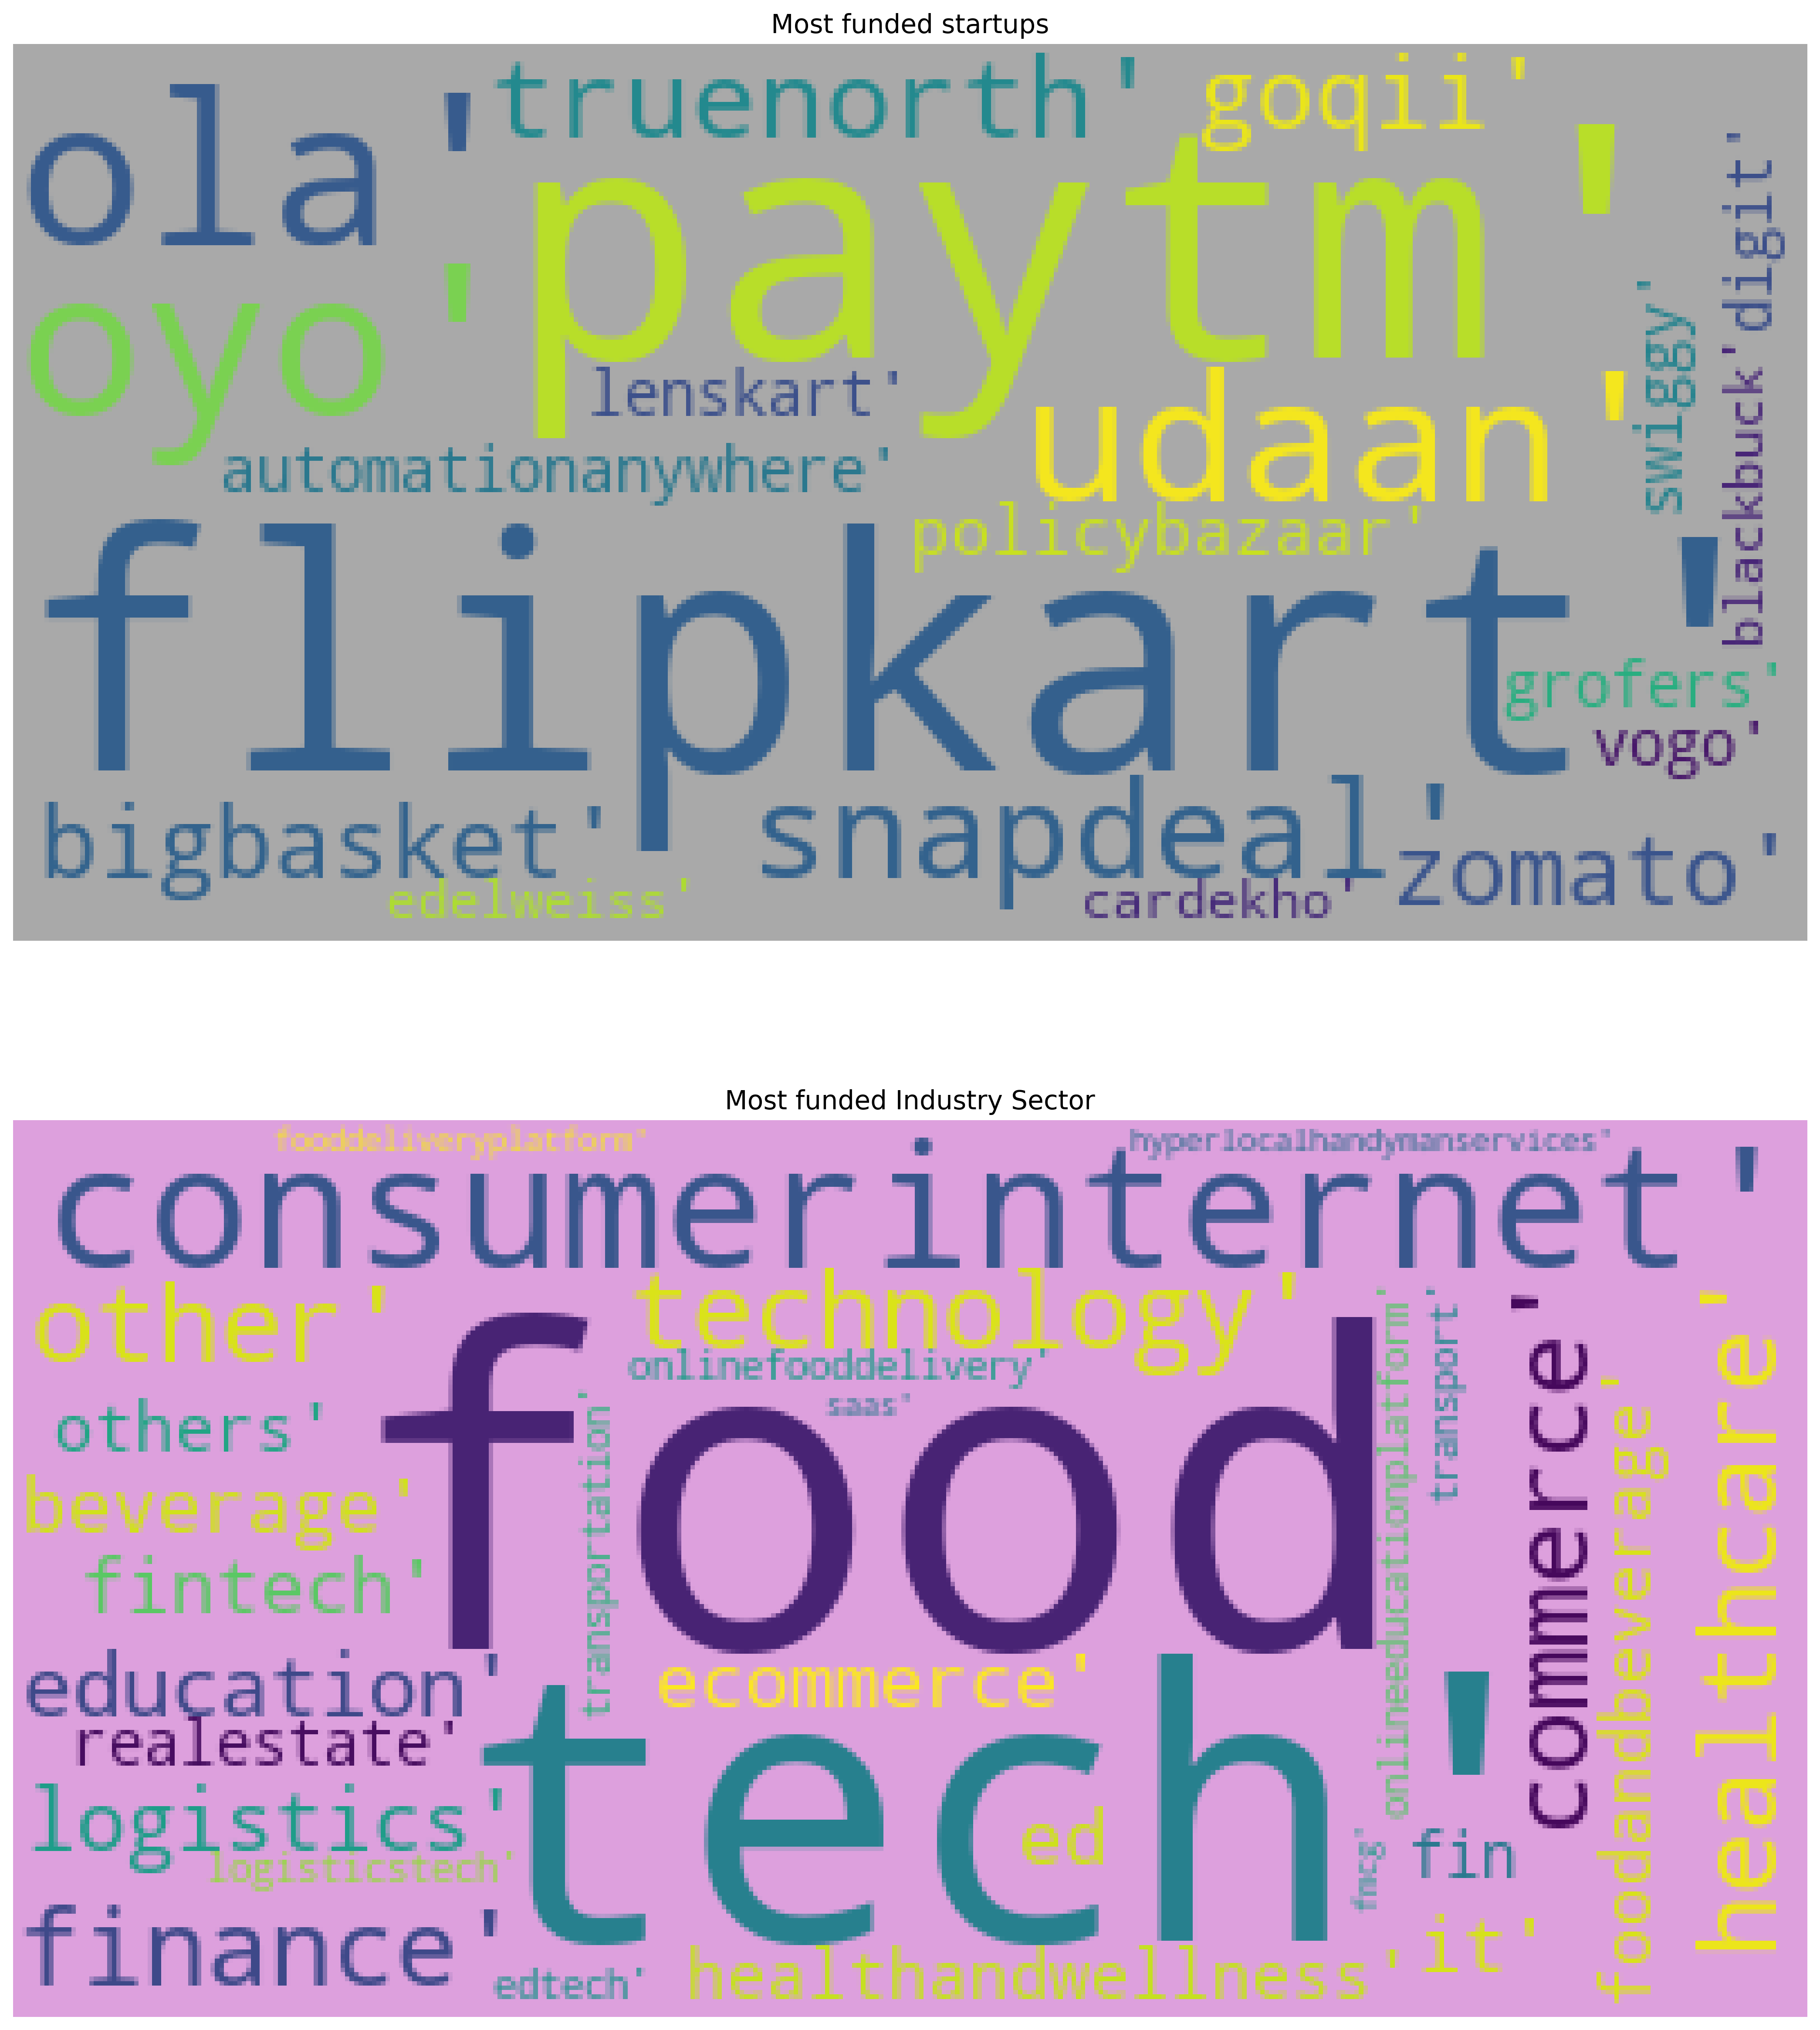

In [122]:
from wordcloud import WordCloud, STOPWORDS


st=pd.Series(newdf.groupby('StartupName').sum()['CleanedAmount'].sort_values(ascending=False).head(40).index).head(30)
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,20),dpi=300)

for char in range(len(st)):
    st[char]=st[char].replace(' ','_')

wc=WordCloud(max_words=20,stopwords=set(st),background_color='darkgrey',random_state=0).generate(str(st.values[:30]))
ax[0].axis('off')
ax[0].set_title('Most funded startups')
ax[0].imshow(wc)




c=np.array(newdf['IndustryVertical'].value_counts().head(30).index.unique())
for char in range(len(c)):
    c[char]=c[char].replace(' ','_')

               
wc=WordCloud(max_words=30,stopwords=set(c),background_color='plum',random_state=1).generate(str(c))

ax[1].axis('off')
ax[1].set_title('Most funded Industry Sector')

ax[1].imshow(wc)
plt.rcParams['axes.facecolor'] = 'white'


* When it comes to the mean value of funding, 2020 leads the pack with an average of 55 Million USD.
* But the year has just started, should the mean funding of 2020 be considered or there is something we are missing? Check the number of funds raised in the year 2020, it is pretty less.
* We will consider 2019 data as valid data for mean funding.

## Investment Type

Now let us explore the investment type of the funding deals like whether it is seed funding, private equity funding or so on.


### Can we get an idea about the number and value of funding deals with respect to the investment type?

In [131]:
# Creating a function to plot horizontal bar graph
def horizontal_bar_chart(srs):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h'
    )
    return trace

cnt_srs = newdf['InvestmentType'].value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Count of Investment type",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=400,
)

data = [horizontal_bar_chart(cnt_srs)]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")





* Seed funding tops the chart closely followed by Private Equity and seed angel funding
    
* We can clearly see the decreasing number of deals as we move up the stages of funding rounds like Series A, B, C & D



In [130]:
cnt_df = df.groupby('InvestmentType')['CleanedAmount'].agg(['size', 'sum', 'mean'])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_df = cnt_df.iloc[:10,:]
cnt_srs = cnt_df["sum"]
cnt_srs = cnt_srs[["Seed Funding", "Seed Angel Funding", "PreSeries A", "Series A", "Series B", "Series C", "Series D", "Private Equity"]]
layout = go.Layout(
    title=go.layout.Title(
        text="Sum of investment amount by Investment Type",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=400,
)

data = [horizontal_bar_chart(cnt_srs)]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")




* Private equity funding seems to be the one with high number of deals and the highest sum value of 26.7B raised as well
* Though seed funding has 1388 funding deals, the sum of money raised is just about 500M since they happen during the very early stages of a startup.

Now let us see what is the average value raised by the startups in each of these funding rounds.


We can see a clear increase in the mean funding value as we go up the funding round ladder from Seed funding to Series D as expected.

# Insights regarding the best startup in terms of funding amount


In [134]:
newdf[newdf['StartupName']=='paytm']

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,year,yearmonth,CleanedAmount,numberofinvestors
31,2019-11-25,paytm,fintech,mobilewallet,ncr,Vijay Shekhar Sharma,fundinground,"1,00,00,00,000",2019,2019-11-01,1.000000e+09,1
251,2018-06-26,paytm,technology,digitalpaymentplatform,ncr,One 97 Communications,privateequity,"89,50,000",2018,2018-06-01,8.950000e+06,1
830,2017-05-18,paytm,e-commerce,mobilewallet&ecommerceplatform,bangalore,SoftBank Group,privateequity,"1,40,00,00,000",2017,2017-05-01,1.400000e+09,1
938,2017-03-03,paytm,e-commerce,ecommercemarketplace,bangalore,Alibaba,privateequity,"20,00,00,000",2017,2017-03-01,2.000000e+08,1
1493,2016-08-30,paytm,e-commerce,mobilewallet&ecommerceplatform,bangalore,MediaTek Inc.,privateequity,"6,00,00,000",2016,2016-08-01,6.000000e+07,1
2459,2015-09-29,paytm,e-commerce&m-commerceplatform,other,ncr,"Alibaba Group, Ant Financial",privateequity,"68,00,00,000",2015,2015-09-01,6.800000e+08,2
2890,2015-03-13,paytm,other,other,notspecific,Ratan Tata,privateequity,NaN,2015,2015-03-01,-9.990000e+02,1
2948,2015-02-05,paytm,other,other,notspecific,Ant Financial Services (Alipay),privateequity,NaN,2015,2015-02-01,-9.990000e+02,1


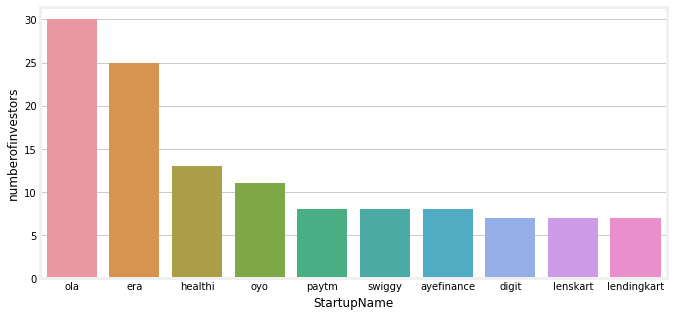

Here we can see that kernel density of startups having two and three number of investors is high


In [142]:
# COMPANIES WITH MOST NUMBER OF INVESTORS
cmi=newdf.groupby('StartupName')['numberofinvestors'].count().sort_values(ascending=False)
fig=plt.figure(figsize=(10,5))
sns.barplot(y='numberofinvestors',x='StartupName',data=cmi.reset_index().head(10))
plt.show()
# cmi.head(15)
print('Here we can see that kernel density of startups having two and three number of investors is high')

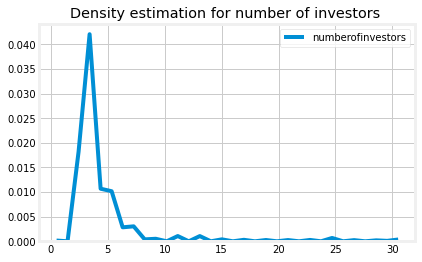

here we can see that there is 50% relation between funding amount and number of investors


In [144]:
sns.kdeplot(data=cmi.reset_index()['numberofinvestors'],gridsize=20,)#most are  2 or 3 in number
plt.title('Density estimation for number of investors ')
plt.show()
print('here we can see that there is 50% relation between funding amount and number of investors')

## INVESTORS WITH MOST FUNDING FREQUENCY

In [158]:
newdf.head(2)

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,year,yearmonth,CleanedAmount,numberofinvestors
0,2020-01-09,byju’s,e-tech,e-learning,bangalore,Tiger Global Management,privateequityround,"20,00,00,000",2020,2020-01-01,200000000.0,1
1,2020-01-13,shuttl,transportation,appbasedshuttleservice,ncr,Susquehanna Growth Equity,seriesc,"80,48,394",2020,2020-01-01,8048394.0,1


In [175]:
unique_investors=newdf['InvestorsName'].unique()
unique_investors

In [167]:
invname= newdf['InvestorsName'].value_counts()[:15]
layout = go.Layout(
    title=go.layout.Title(
        text="Top Investors in Frequency",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=400,
)

data = [horizontal_bar_chart(invname)]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="fname")


In [180]:
d=dict()#to store individual investors and funding amount in key-value pairs
for i in unique_investors:
    for j in range(len(listed_n_inv)):
        if i in listed_n_inv[j]:
            d[i]=newdf['CleanedAmount'][j]/len(listed_n_inv[j])#taking average of amount 
            

In [181]:
Investor_amount=pd.Series(d,name='Amount')

Investor_amount=Investor_amount.reset_index().groupby('index').sum()['Amount'].sort_values(ascending=False).head(100)
Investor_amount=Investor_amount.reset_index()
Investor_amount.columns=["Investor","Amount"]

Top 10 Most funded Investors
                                            Investor        Amount
0           steadview capital and existing investors  7.000000e+08
1                                          microsoft  4.666667e+08
2             bennett coleman and company ltd (bccl)  4.500000e+08
3                                      alibaba group  3.400000e+08
4                                softbank group corp  3.300000e+08
5                                  altimeter capital  2.925000e+08
6                                   simi pacific pte  2.600000e+08
7  dst global and lightspeed venture partners\\xe...  2.250000e+08
8                               amour infrastructure  2.200000e+08
9  ontario teachers\\xe2\\x80\\x99 pension plan &...  2.000000e+08


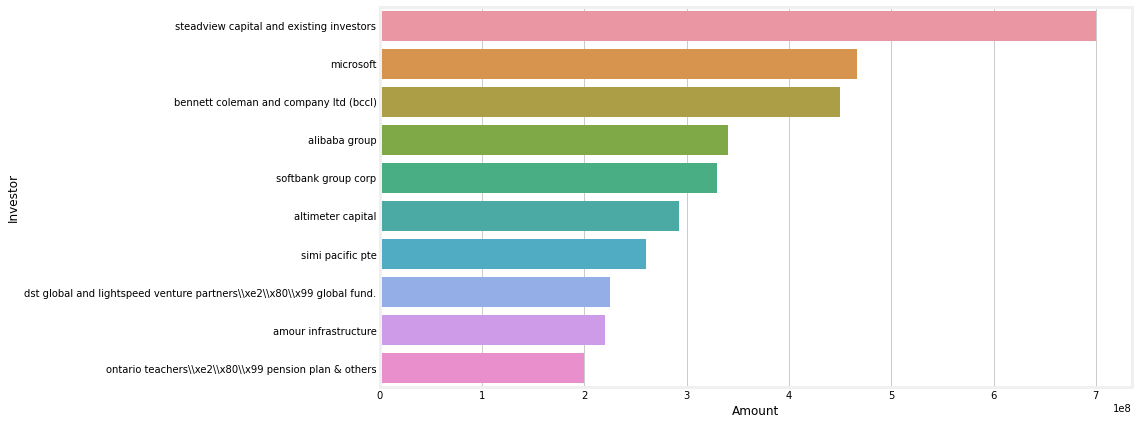

In [184]:
print('Top 10 Most funded Investors')
plt.figure(figsize=(12,7))
sns.barplot(y='Investor',x='Amount',data=Investor_amount.head(10))
print(Investor_amount.head(10))
plt.show()

###  WHICH INDUSTRY VERTICAL OPTED BY TOP INVESTORS

In [187]:
top_industry_vertical={}
for i in Investor_amount['Investor'].head(20):
    for j in range(len(listed_n_inv)):
        if i in listed_n_inv[j]:
            top_industry_vertical[i]=newdf['IndustryVertical'][j]

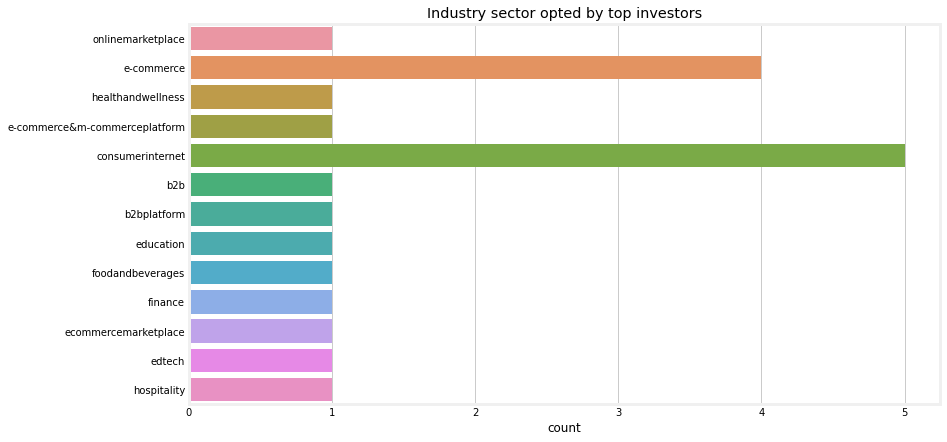

In [190]:
plt.figure(figsize=(12,7))
sns.countplot(y=pd.Series(top_industry_vertical))
plt.title('Industry sector opted by top investors' )
# print('top investor\'s favourite Industry  ')
# print(pd.Series(top_industry_vertical))
plt.show()

In [194]:
newdf.head(3)

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,year,yearmonth,CleanedAmount,numberofinvestors
0,2020-01-09,byju’s,e-tech,e-learning,bangalore,Tiger Global Management,privateequityround,"20,00,00,000",2020,2020-01-01,200000000.0,1
1,2020-01-13,shuttl,transportation,appbasedshuttleservice,ncr,Susquehanna Growth Equity,seriesc,"80,48,394",2020,2020-01-01,8048394.0,1
2,2020-01-09,mamaearth,e-commerce,retailerofbabyandtoddlerproducts,bangalore,Sequoia Capital India,seriesb,"1,83,58,860",2020,2020-01-01,18358860.0,1


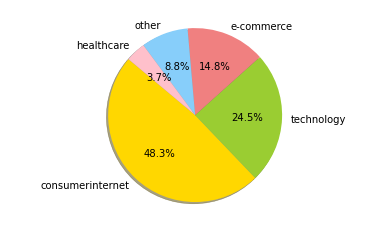

In [300]:
# converting all industry vertical entries to lower to avoid category duplication
newdf['IndustryVertical']=newdf['IndustryVertical'].apply(lambda x:x.lower())
#in which sector there are most startups
d=newdf['IndustryVertical'].value_counts().head(5)
f=newdf.groupby('InvestmentType').sum()['CleanedAmount']
labels=[d.index,f.index]
size=[d.values,f.values]
colors = [['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink'],['green','pink','red','yellow']]
plt.axis('equal')
plt.pie(size[0],explode=None, labels=labels[0], colors=colors[0],autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

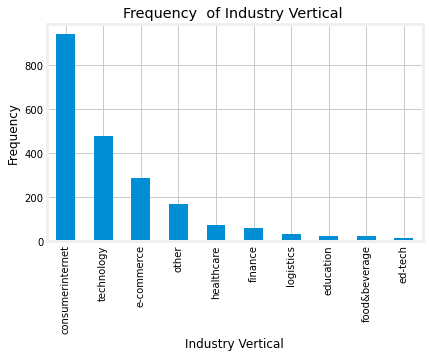

In [306]:
plt.figure(figsize=(6,4))
iv=newdf['IndustryVertical'].value_counts().head(10)
iv.plot.bar()

plt.title('Frequency  of Industry Vertical ')
plt.ylabel('Frequency')
plt.xlabel('Industry Vertical')
plt.show()

## Location

### Find about the major start up hubs in India.

Now let us explore the location of the startups that got funded. This can help us to understand the startup hubs of India.

Since there are multiple locations in the data, let us plot the top 10 locations. We will also club New Delhi, Gurgaon & Noida together to form NCR for the below chart.

In [211]:
# similar function like earlier just with an additional parameter for colour
def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace
# plotting the graph with respect to location

cnt_srs = newdf['City'].value_counts()[:14]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals in each location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")




* NCR & Bangalore are almost equal to each other with respect to number of funding deals followed by Mumbai in third place.
    
* Chennai, Hyderabad & Pune are the next set of cities are that are catching up.



In [225]:
# subsetting the data with respec to City
cnt_df = newdf.groupby('City')['CleanedAmount'].agg(["size", "sum", "mean"])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_df = cnt_df.iloc[:14,:]

# plotting a graph
cnt_srs = cnt_df['sum']
cnt_srs = cnt_srs.sort_values(ascending=False)
layout = go.Layout(
    title=go.layout.Title(
        text="Total funding value by location",
        x=0.5
    ),
    font=dict(size=14),
    width=500,
    height=500,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")



* Though NCR tops the number of funding deals when it comes to the total funding value by location, Bangalore leads the way by a huge margin.



In [226]:
cnt_srs = cnt_df['mean']
cnt_srs = cnt_srs.sort_values(ascending=False)
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding value by location",
        x=0.5
    ),
    font=dict(size=14),
    width=500,
    height=500,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")




* Bangalore tops the list here again
* Jaipur took the fourth spot with respect to mean funding value



### MORE INFORMATION ABOUT THE INVESTMENT TYPE SPREAD ACROSS THE THE CITIES

In [235]:
newdf['InvestmentType'].unique()

array(['privateequityround', 'seriesc', 'seriesb', 'preseriesa',
       'seedfunding', 'seriesa', 'seriesd', 'seed', 'seriesf', 'seriese',
       'debtfunding', 'seriesg', 'seriesh', 'venture', 'fundinground',
       'corporateround', 'maidenround', 'seedfundinground',
       'singleventure', 'ventureround', 'angel', 'seriesj', 'angelround',
       'ventureseriesunknown', 'bridgeround', 'privateequity',
       'debtandpreferencecapital', 'inhousefunding', 'seedangelfunding',
       'debt', 'equity', 'mezzanine', 'seriesbextension',
       'equitybasedfunding', 'privatefunding', 'private',
       'structureddebt', 'termloan', 'angelfunding', 'privatenequity',
       'crowdfunding'], dtype=object)

In [294]:
# sns.barplot(y='City',x='CleanedAmount',data=newdf[newdf['InvestmentType']=='debt'],estimator=np.sum,palette='coolwarm')

#average investment in banglore is most
# plt.show()
newdf[newdf['InvestmentType']=='seedangelfunding' ].head(5)

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,year,yearmonth,CleanedAmount,numberofinvestors
106,2019-04-10,unacademy,edtech,e-learning,bangalore,Kalyan Krishnamurthy,seedangelfunding,"3,07,000",2019,2019-04-01,307000.0,1
126,2018-11-01,godesi,foodandbeverage,regionalflavours,bangalore,Lead Angels Network,seedangelfunding,"1,38,995",2018,2018-11-01,138995.0,1
134,2018-11-14,cleansecar,services,carwash,bangalore,Venture Catalysts,seedangelfunding,"5,00,000",2018,2018-11-01,500000.0,1
144,2018-10-01,northmist,fashion,menswear,ncr,Prashant Jaiswal,seedangelfunding,NaN,2018,2018-10-01,-999.0,1
145,2018-10-02,origocommoditiesindiapvt.ltd,logistics,supplychain,hyderabad,"Cooperative Oikocredit, Caspian and Hivos-Trio...",seedangelfunding,"1,10,00,000",2018,2018-10-01,11000000.0,2


                 INVESTMENT TYPE - SEED-ANGEL FUNDING


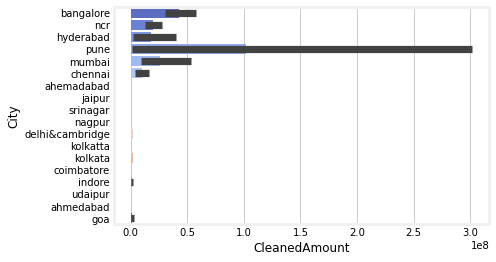

PUNE RANKS HIGHEST IN SEED ANGEL FUNDING


In [295]:
sns.barplot(y='City',x='CleanedAmount',data=newdf[newdf['InvestmentType']=='seedangelfunding'],estimator=np.sum,palette='coolwarm')

#average investment in banglore is most
print('                 INVESTMENT TYPE - SEED-ANGEL FUNDING')
plt.show()
print('PUNE RANKS HIGHEST IN SEED ANGEL FUNDING')


### Industry Vertical

Let us now have a look at the industry verticals and the number of funding deals for each vertical.


In [366]:
# subsetting the data accordin to Industry vertical
cnt_srs = newdf['IndustryVertical'].value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by Industry Vertical",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs,"#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")



Consumer Internet is the most preferred industry segment for funding followed by Technology and E-commerce.



In [367]:
# Getting a subset of the data based on Industry vertical, year and amount
temp_df = newdf.groupby(["IndustryVertical","year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
# Major industries to be used
values_to_use = ["Consumer Internet", "Technology", "E-Commerce", "Healthcare", "Finance", "Logistics"]
temp_df = temp_df[temp_df["IndustryVertical"].isin(values_to_use)]
# excluding the year 2015 as it has only one major industry investment  that is E-commerce, you can include it if you want as well
temp_df = temp_df[temp_df["year"]!=2015]
temp_df.columns = ["IndustryVertical", "Year", "Count", "Mean"]

# fig = px.scatter(temp_df, x="Year", y="IndustryVertical", color='IndustryVertical', size="Count")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by industry over time",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

## Time Series Analysis

In [307]:
dnewdf=newdf.set_index('Date')
dnewdf.head()

,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,year,yearmonth,CleanedAmount,numberofinvestors
Date,,,,,,,,,,,
2020-01-09,byju’s,e-tech,e-learning,bangalore,Tiger Global Management,privateequityround,"20,00,00,000",2020,2020-01-01,200000000.0,1
2020-01-13,shuttl,transportation,appbasedshuttleservice,ncr,Susquehanna Growth Equity,seriesc,"80,48,394",2020,2020-01-01,8048394.0,1
2020-01-09,mamaearth,e-commerce,retailerofbabyandtoddlerproducts,bangalore,Sequoia Capital India,seriesb,"1,83,58,860",2020,2020-01-01,18358860.0,1
2020-01-02,thb,fintech,onlineinvestment,ncr,Vinod Khatumal,preseriesa,"30,00,000",2020,2020-01-01,3000000.0,1
2020-01-02,fashor,fashionandapparel,embroiledclothesforwomen,mumbai,Sprout Venture Partners,seedfunding,"18,00,000",2020,2020-01-01,1800000.0,1


Plotting Average Year-Start-wise graph for investment in period between January-2015 to Jan-2020 (Annual Starting


Text(0.5, 1.0, 'average funding amount')

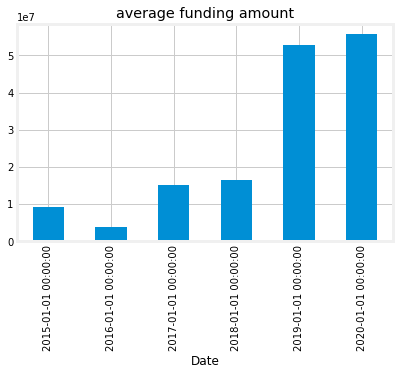

In [309]:
q=dnewdf['CleanedAmount'].resample('AS').mean()
print('Plotting Average Year-Start-wise graph for investment in period between January-2015 to Jan-2020 (Annual Starting')
q.plot(kind='bar')
plt.title('average funding amount')

Text(0.5, 1.0, 'Funding Variation Per Month from 2015-2020')

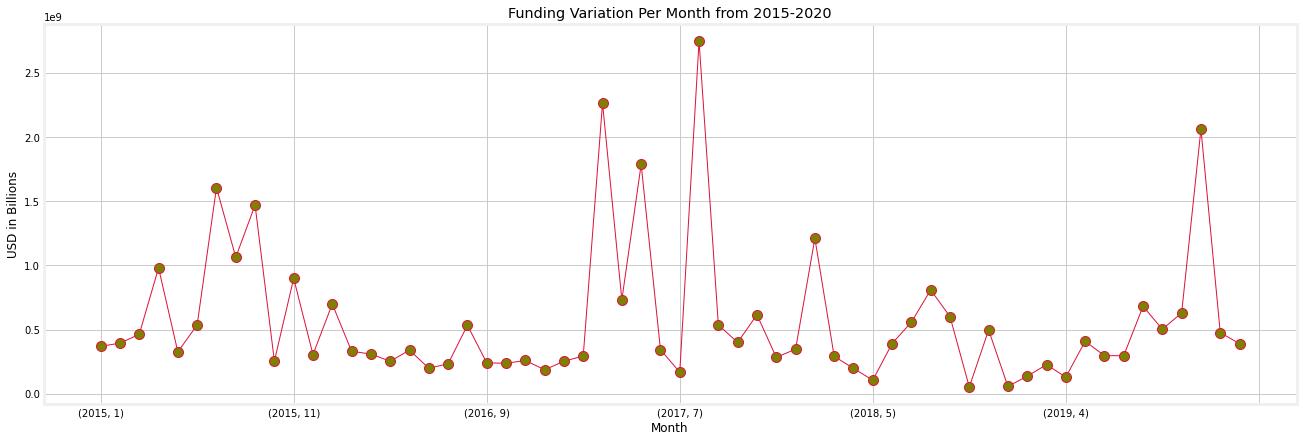

In [324]:
newdf['year']=newdf['Date'].dt.year
newdf['month']=newdf['Date'].dt.month
fig =plt.figure(figsize=(20,7))
fig.set_figheight
ts_month = newdf.groupby(['year', 'month']).agg({'CleanedAmount':'sum'})['CleanedAmount']
ts_month.plot(linewidth=1, color='crimson',marker="o", markersize=10, markerfacecolor='olive')
plt.ylabel('USD in Billions')
plt.xlabel('Month');
plt.title('Funding Variation Per Month from 2015-2020')
# ts_month

### Insights of 2015-2020
#### 1. 2015

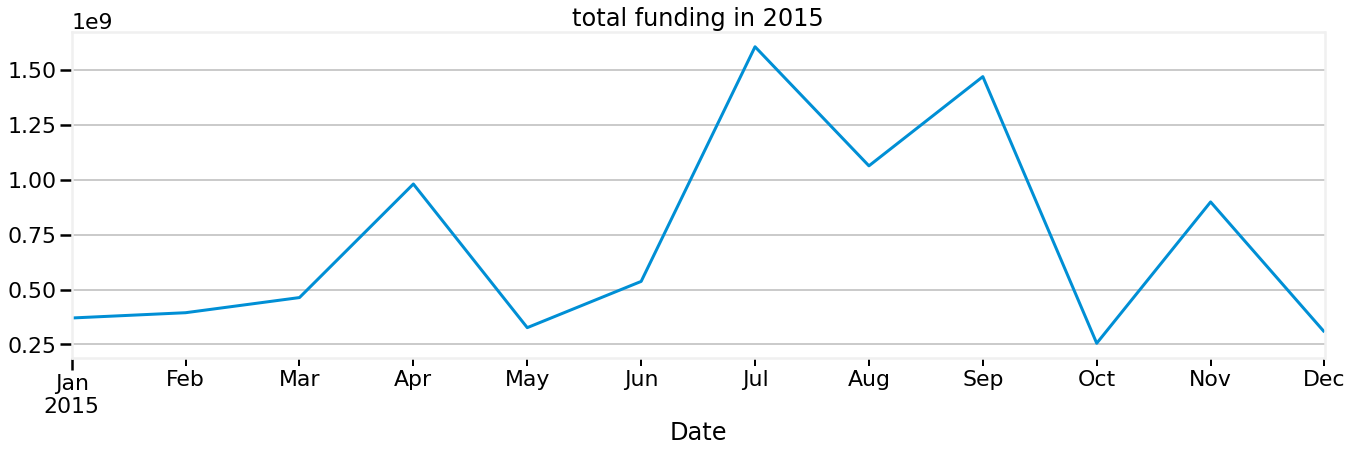

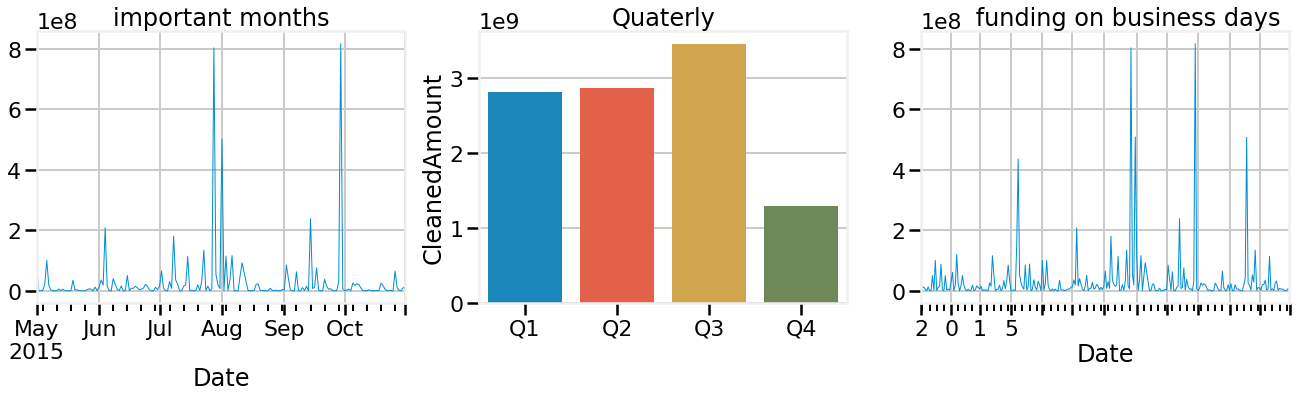

In [333]:
sns.set_context('poster',font_scale=1)
plt.figure(figsize=(20,6))
a=dnewdf['2015'].resample('MS').sum()['CleanedAmount'].plot()
a.set_title('total funding in 2015')
#insights of june-july and august of 2015
fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=dnewdf['2015-05':'2015-10'].resample('d')['CleanedAmount'].sum().plot(ax=axes[0],lw=1)
a1.set_title('important months')
a2=sns.barplot(data=dnewdf['2017'].resample('Q').sum().reset_index(),y='CleanedAmount',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
a2.set_title('Quaterly')
a3=dnewdf['2015'].resample('B')['CleanedAmount'].sum().plot(ax=axes[2],lw=1)
a3.set_title('      funding on business days')
a3.set_xticklabels('2015')
plt.show()

* Total funding reached to its peak between the months of march - may and Aug - Sep of 2015
* End week of june was most attracted to investments
* Quarter 3 was seen as the most funded quarter of 2015

#### 2. 2016

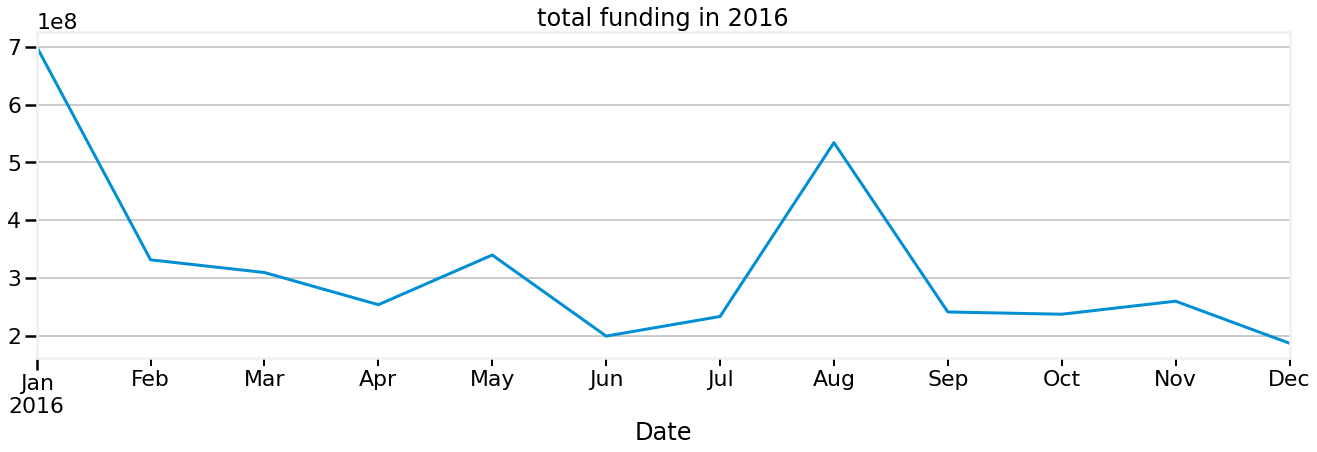

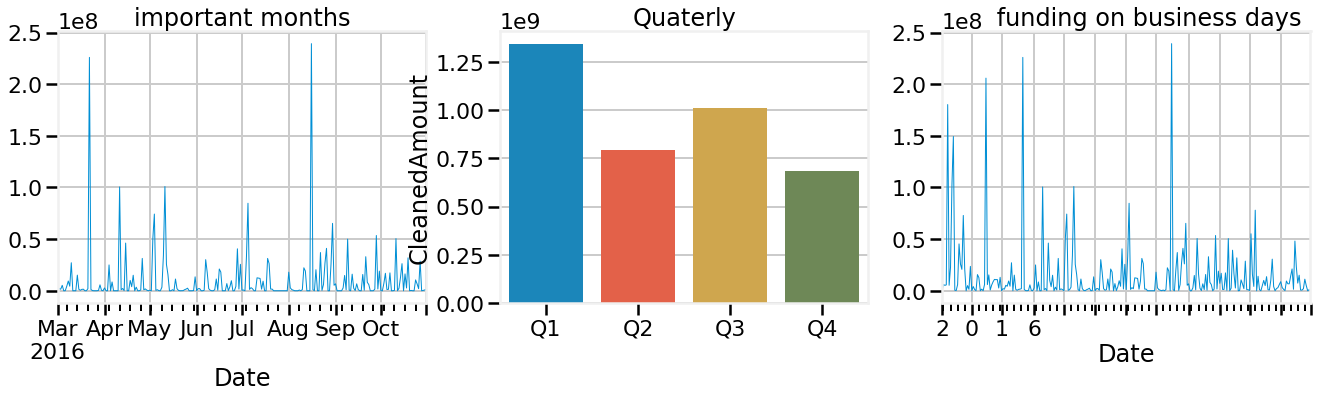

In [332]:
sns.set_context('poster',font_scale=1)
plt.figure(figsize=(20,6))
a=dnewdf['2016'].resample('MS').sum()['CleanedAmount'].plot()
a.set_title('total funding in 2016')

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=dnewdf['2016-03':'2016-10'].resample('d')['CleanedAmount'].sum().plot(ax=axes[0],lw=1)
a1.set_title('important months')
a2=sns.barplot(data=dnewdf['2016'].resample('Q').sum().reset_index(),y='CleanedAmount',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
a2.set_title('Quaterly')
a3=dnewdf['2016'].resample('B')['CleanedAmount'].sum().plot(ax=axes[2],lw=1)
a3.set_title('      funding on business days')
a3.set_xticklabels('2016')
plt.show()

* It seems to be january and augest was the most funding month in 2016
* A sudden increase is witnessed in the month of july - August

* june seems to be the decline in funding may be due to goverment administration

* further after september uniform low funding due to demonetization of indian currency

* early weeeks of august seems to be the most funding time

* An inverse relation among funding by Quarter

#### 3. 2017

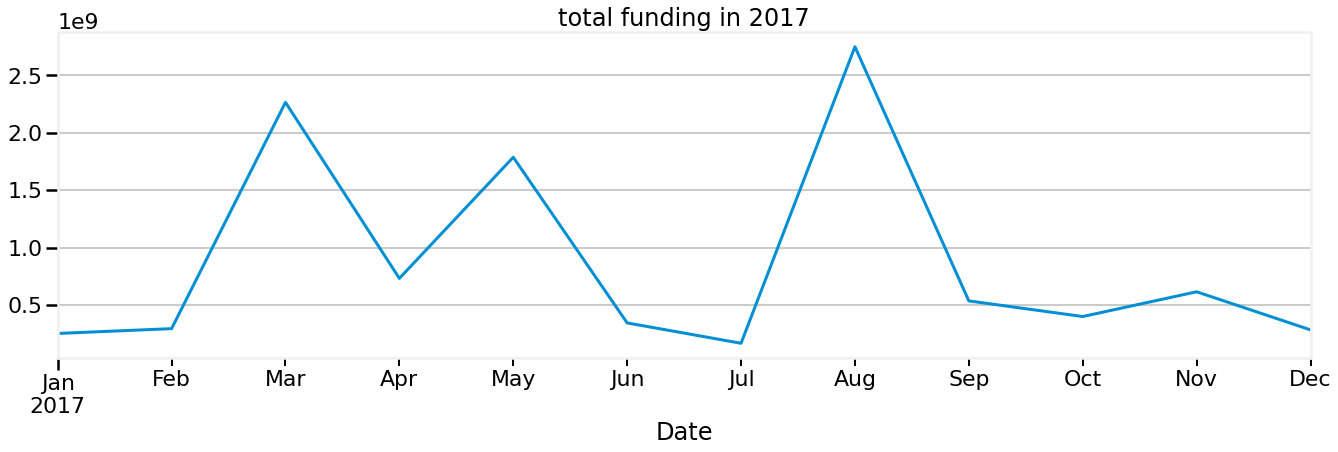

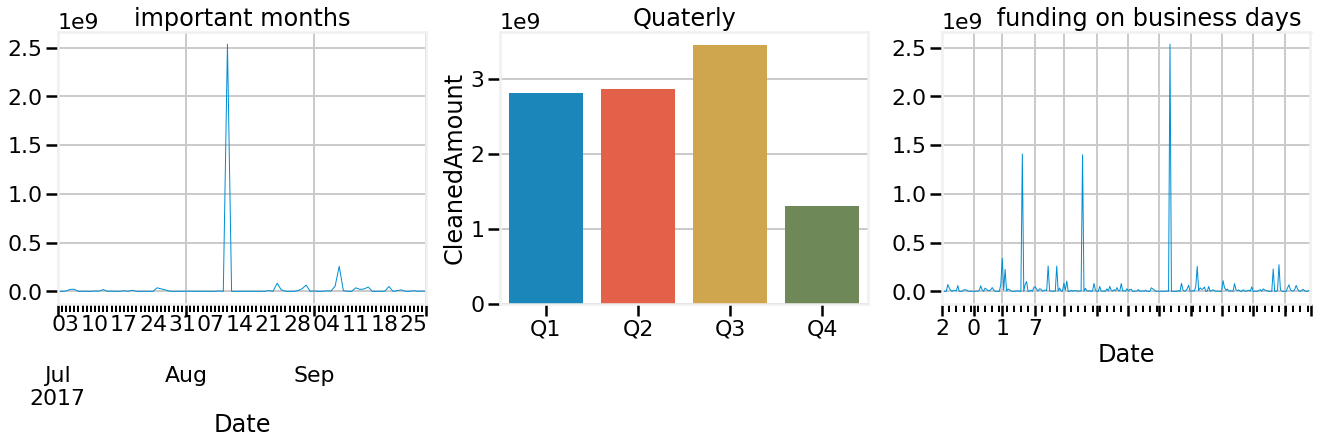

In [334]:
sns.set_context('poster',font_scale=1)
plt.figure(figsize=(20,6))
a=dnewdf['2017'].resample('MS').sum()['CleanedAmount'].plot()
a.set_title('total funding in 2017')

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=dnewdf['2017-07':'2017-9'].resample('d')['CleanedAmount'].sum().plot(ax=axes[0],lw=1)
a1.set_title('important months')
a2=sns.barplot(data=dnewdf['2017'].resample('Q').sum().reset_index(),y='CleanedAmount',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
a2.set_title('Quaterly')
a3=dnewdf['2017'].resample('B')['CleanedAmount'].sum().plot(ax=axes[2],lw=1)
a3.set_title('      funding on business days')
a3.set_xticklabels('2017')
plt.show()

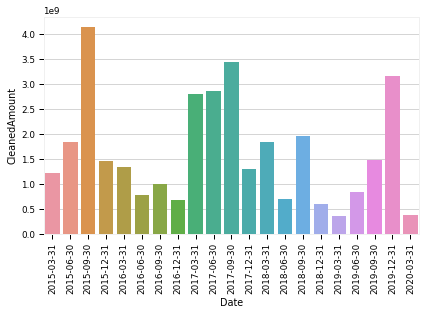

In [344]:
sns.set_context('paper')
dft=dnewdf.resample('Q').sum()
dft.index=dft.reset_index()['Date'].apply(lambda x: x.date())
a=sns.barplot(data=dft.reset_index(),x='Date',y='CleanedAmount')
plt.sca(a)
plt.xticks(rotation=90)
plt.title('')

# sns.distplot(dnewdf.sum()['CleanedAmount'])

plt.show()

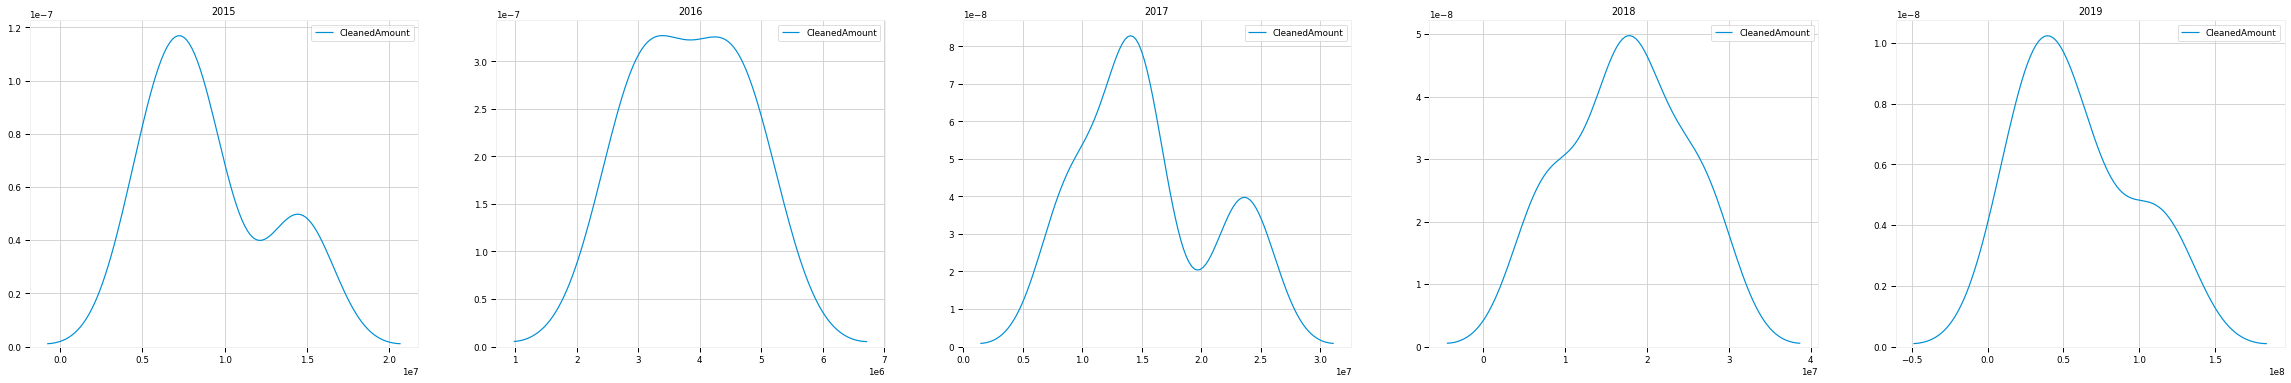

In [356]:
fig,axes = plt.subplots(nrows=1,ncols=5,figsize=(36,6))

plt.sca(axes[0])
plt.title('2015')
sns.kdeplot(dnewdf.resample('q').mean()['CleanedAmount']['2015'],ax=axes[0])

plt.sca(axes[1])
plt.title('2016')
sns.kdeplot(dnewdf.resample('q').mean()['CleanedAmount']['2016'],ax=axes[1])

plt.sca(axes[2])
plt.title('2017')
sns.kdeplot(dnewdf.resample('q').mean()['CleanedAmount']['2017'],ax=axes[2])

plt.sca(axes[3])
plt.title('2018')
sns.kdeplot(dnewdf.resample('q').mean()['CleanedAmount']['2018'],ax=axes[3])

plt.sca(axes[4])
plt.title('2019')
sns.kdeplot(dnewdf.resample('q').mean()['CleanedAmount']['2019'],ax=axes[4])

plt.show()

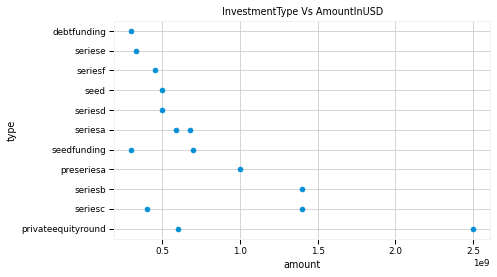

Private equity is seen to be most favourable Investment Mode for high funding amount per startup


In [363]:
plt.scatter(x=newdf['CleanedAmount'].sort_values(ascending=False).head(15),y=newdf['InvestmentType'].head(15))
plt.title('InvestmentType Vs AmountInUSD')
plt.xlabel('amount')
plt.ylabel('type')
plt.show()
print('Private equity is seen to be most favourable Investment Mode for high funding amount per startup')

AxesSubplot(0.08,0.125;0.87x0.755)
seedfunding       499
privateequity     434
crowdfunding        2
privatenequity      1
Name: InvestmentType, dtype: int64


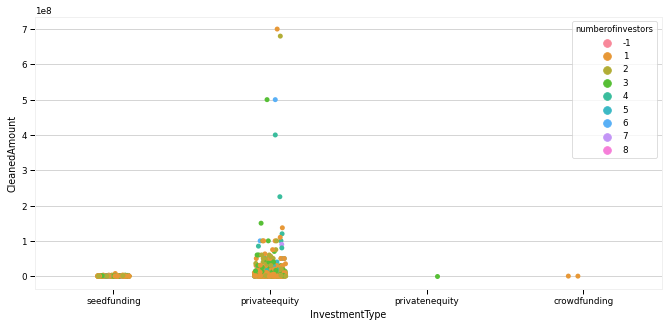

In [365]:
plt.figure(figsize=(10,5))
d2015=dnewdf['2015']
print(sns.stripplot(data=d2015,x='InvestmentType',y='CleanedAmount',jitter=True,hue='numberofinvestors'))

print(d2015['InvestmentType'].value_counts())
d2015[d2015['InvestmentType']=='privateequity'].sort_values(by='AmountInUSD',ascending=False).head(5)
plt.show()

1. Private equity is more dispersed according to amount funded
and more amount is invested through private equity per startup on the otherhand seed funding is less dispersed according to amount funded and low amount is funded using this but frequency of seed funding is more as compared to private equity
2. No debt funding occured in 2015